In [2]:
#사용할 라이브러리 import
import numpy as np
import pandas as pd
from IPython.display import display

### (7)DataFrame, Operations
https://pandas.pydata.org/pandas-docs/version/0.23.4/api.html

#### Descriptive statistics

통계함수 제공 :  sum(), mean(), quantile()..

함수 호출 구조 

  - 행방향 계산( default)   
   - 데이터프레임명.함수명(axis=0)  , 데이터프레임명.함수명(axis=“index”)  
   - df.sum(), df.sum(0) : 행방향 각 열의 합  
  - 열방향 계산   
    - 데이터프레임명.함수명(axis=1)  , 데이터프레임명.함수명(axis=“columns”)  
    - df.sum(1) :  열방향 각 행의 합

통계 함수 목록  

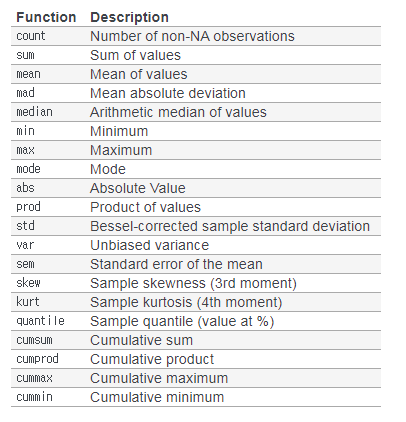


In [19]:
#통계함수 사용 예
data = np.random.randint(8, size=(5, 3)) #random number
idx = np.arange(5)
col = list('ABC')
df = pd.DataFrame(data, index=idx, columns=col)  #data, 핼, 열 레이블 설정
display(df)

print ("df.sum()=\n", df.sum())  #행방향 각 열의 합
print ("df.sum(0)=\n", df.sum(0))
print ("df.sum(1)=\n", df.sum(1)) #열방향 각 행의 합
print ("df['B'].sum()=\n", df['B'].sum())

,A,B,C
0,3,3,6
1,6,4,1
2,3,6,5
3,7,3,1
4,6,2,5


df.sum()=
 A    25
B    18
C    18
dtype: int64
df.sum(0)=
 A    25
B    18
C    18
dtype: int64
df.sum(1)=
 0    12
1    11
2    14
3    11
4    13
dtype: int64
df['B'].sum()=
 18


In [6]:
#통계함수 사용 예
data = np.random.randint(10, size=(7, 3))  #random number
col = list('XYZ')
df = pd.DataFrame(data)  #data만으로 생성
df.columns = col         #열레이블 설정

count = df.count()
csum = df.sum()
rsum = df.sum(axis=1)  
rmean = df.mean(axis="columns")
mean = df.mean()
min1 = df.min()
max1 = df.max()

df2 = df.copy()
df2.loc['count'] = count
df2.loc['sum'] = csum
df2.loc['mean'] = mean
df2.loc['min'] = min1
df2.loc['max'] = max1
df2['rsum'] = rsum
df2['rmean'] = rmean
display(df2)

,X,Y,Z,rsum,rmean
0,5.000000,4.000000,1.000000,10.0,3.333333
1,2.000000,7.000000,8.000000,17.0,5.666667
2,2.000000,8.000000,6.000000,16.0,5.333333
3,3.000000,4.000000,8.000000,15.0,5.000000
4,5.000000,6.000000,8.000000,19.0,6.333333
5,4.000000,9.000000,6.000000,19.0,6.333333
6,1.000000,2.000000,0.000000,3.0,1.000000
count,7.000000,7.000000,7.000000,NaN,NaN
sum,22.000000,40.000000,37.000000,NaN,NaN
mean,3.142857,5.714286,5.285714,NaN,NaN


### (8)DataFrame, File IO

https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html  

다양한 파일 형식의 데이터를 읽고 저장   
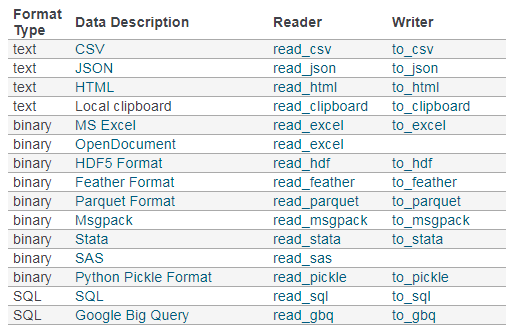

In [8]:
import os
cd = os.getcwd()  #현재 디렉토리 확인
print(cd)
print(os.listdir(cd)) #현재디렉토리 목록 확인

C:\Users\hjsong\Documents\BigData
['.ipynb_checkpoints', 'bigdata2_jupyterNotebook_Markdown.ipynb', 'bigdata3_irisClassification.ipynb', 'bigdata4_Boston.ipynb', 'bigdata4_LinearRegression.ipynb', 'bigdata5_numpy.ipynb', 'bigdata5_numpy_all.ipynb', 'bigdata6_pandas1.ipynb', 'bigdata7_pandas2.ipynb', 'bignata5_numpy_EX.ipynb', 'bogdata6_pandas_EX.ipynb', 'data', 'datamining5_pandas_QA.ipynb', 'helloworld.ipynb', 'Report5_numpy.ipynb', 'Report6_pandas.ipynb']


In [11]:
# 3명 학생의 수학, 영어 성적 dataframe을 data폴더의 score파일로 저장
index=['kim', 'min', 'lee']
d = {'math': pd.Series([80, 90, 100]),
     'eng': pd.Series([90, 100, 88]) }
df = pd.DataFrame(d)
df.index = index
display("df=", df)

df.to_csv('data/scores.csv') #df를  scores.csv파일로 저장
df.to_excel('data/scores.xlsx', sheet_name='midsheet') #df를  scores.xls파일의 midsheet로 저장
df2= pd.read_csv('data/scores.csv') #scores.csv파일을 데이터프레임 df2로 읽기
df3= pd.read_csv('data/scores.csv',index_col=0) 
                     #scores.csv파일을 데이터프레임 df3로 읽기, 첫번째 컬럼을 인덱스로 사용
df4=  pd.read_excel('data/scores.xlsx', index_col=0, sheet_name='midsheet') 
                     #scores.xlsx의 midsheet를 데이터프레임 df4로 읽기,첫번째 컬럼을 인덱스로 사용 
display("df2=", df2)
display("df3=", df3)
display("df4=", df4)

'df='

,math,eng
kim,80,90
min,90,100
lee,100,88


'df2='

,Unnamed: 0,math,eng
0,kim,80,90
1,min,90,100
2,lee,100,88


'df3='

,math,eng
kim,80,90
min,90,100
lee,100,88


'df4='

,math,eng
kim,80,90
min,90,100
lee,100,88


### (9) Merging

Append : 행단위로 결합  

Merge :  같은 key로 열단위 결합

In [22]:
#Appending 

d1= pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                 'A': ['A0', 'A1', 'A2', 'A3'],
                 'B': ['B0', 'B1', 'B2', 'B3']})
d2 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                   'C': ['C0', 'C1', 'C2', 'C3'],
                   'D': ['D0', 'D1', 'D2', 'D3']})
display(d1)
display(d2)

d3 = d1.append(d2)   #row combining
display(d3)
d4 = d1.append(d2, ignore_index=True)
display(d4)

#merge
d5= pd.merge(d1, d2, on=['key'])  #key가 같은 데이터만 결합
display(d5)


,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


,key,A,B,C,D
0,K0,A0,B0,NaN,NaN
1,K1,A1,B1,NaN,NaN
2,K2,A2,B2,NaN,NaN
3,K3,A3,B3,NaN,NaN
0,K0,NaN,NaN,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,NaN,NaN,C2,D2
3,K3,NaN,NaN,C3,D3


,key,A,B,C,D
0,K0,A0,B0,NaN,NaN
1,K1,A1,B1,NaN,NaN
2,K2,A2,B2,NaN,NaN
3,K3,A3,B3,NaN,NaN
4,K0,NaN,NaN,C0,D0
5,K1,NaN,NaN,C1,D1
6,K2,NaN,NaN,C2,D2
7,K3,NaN,NaN,C3,D3


,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


### (10) Grouping

Splitting :   GroupBy로  특정속성에 대한 그룹으로 데이터 분리  

Applying  :  그룹에 독립적으로 함수 적용  

Aggregations : 각 그룹에 대한 요약 통계 (또는 통계)를 계산  

In [24]:
df = pd.DataFrame({ 'name': ['kim','min','jin', 'song', 'lee'], 
                     'age': [20, 30, 25, 40, 23],
                     'sex': ['F','M','F','M',"M"],
                     'score': [100,50,80,90,98],
                     'class': pd.Categorical([1, 2,2,3,1,])})
display(df)
print(df.dtypes)

print("\n## df.sum() ##")
print(df.sum())

print("\n## groupby (sex) ##")
grouped = df.groupby('sex')
#그룹 확인
for name, group in grouped:
       print("groupname: " , name)
       print("groupdata:")
       print(group)

#그룹 추출
f = grouped.get_group(name='F')
m = grouped.get_group(name='M')
print("\n## group (female) ##")
display(f)
print("\n## group (male) ##")
display(m)

# 그룹별 연산   
print('\n#grouped.sum()=')
print(grouped.sum())
print('\n#grouped.mean()=')
print(grouped.mean())

#그룹에 대한 요약 통계 
#agg함수에 계산할 통계함수를 포함하여 그룹별 계산
r1 = grouped.agg(['sum', 'mean', 'std'])
print('\n#grouped.agg()=\n', r1)

r2= grouped['score'].agg(['mean', 'std'])
print('\n#grouped[\'score\'].agg()=\n', r2)

,name,age,sex,score,class
0,kim,20,F,100,1
1,min,30,M,50,2
2,jin,25,F,80,2
3,song,40,M,90,3
4,lee,23,M,98,1


name       object
age         int64
sex        object
score       int64
class    category
dtype: object

## df.sum() ##
name     kimminjinsonglee
age                   138
sex                 FMFMM
score                 418
class                   9
dtype: object

## groupby (sex) ##
groupname:  F
groupdata:
  name  age sex  score class
0  kim   20   F    100     1
2  jin   25   F     80     2
groupname:  M
groupdata:
   name  age sex  score class
1   min   30   M     50     2
3  song   40   M     90     3
4   lee   23   M     98     1

## group (female) ##


,name,age,sex,score,class
0,kim,20,F,100,1
2,jin,25,F,80,2



## group (male) ##


,name,age,sex,score,class
1,min,30,M,50,2
3,song,40,M,90,3
4,lee,23,M,98,1



#grouped.sum()=
     age  score
sex            
F     45    180
M     93    238

#grouped.mean()=
      age      score
sex                 
F    22.5  90.000000
M    31.0  79.333333

#grouped.agg()=
     age                 score                      
    sum  mean       std   sum       mean        std
sex                                                
F    45  22.5  3.535534   180  90.000000  14.142136
M    93  31.0  8.544004   238  79.333333  25.716402

#grouped['score'].agg()=
           mean        std
sex                      
F    90.000000  14.142136
M    79.333333  25.716402


### (11) Sampling
랜덤하게 샘플 추출


In [25]:
df = pd.DataFrame({ 'name': ['kim','min','jin', 'song', 'lee'], 
                     'age': [20, 30, 25, 40, 23],
                     'sex': ['F','M','F','M',"M"],
                     'score': [100,50,80,90,98],
                     'class': pd.Categorical([1, 2,2,3,1,])})

dfs1=df.sample(n=3)   # 3개만 임의 추출
dfs2=df.sample(n=3, random_state=1) #재현성을 위한 랜덤 시드 설정
dfs3=df.sample(n=3, weights='class') #class값으로 가중치 설정

display(dfs1)
display(dfs2)
display(dfs3)

,name,age,sex,score,class
1,min,30,M,50,2
2,jin,25,F,80,2
4,lee,23,M,98,1


,name,age,sex,score,class
2,jin,25,F,80,2
1,min,30,M,50,2
4,lee,23,M,98,1


,name,age,sex,score,class
3,song,40,M,90,3
1,min,30,M,50,2
2,jin,25,F,80,2


### 문제 1. physicalFitness 데이터 분석 연습
(1)“physicalFitness.csv” 파일을  읽고 데이터프레임 만들기  
    ageGroup(1-9), sex(1,2), height, weight, BMI, BodyFat 속성으로 구성된 파일  
(2)(1)의 데이터에 대한 데이터 타입들, 요약통계, 상,하위 5개 데이터 확인, 행 레이블, 열 레이블 , 크기 확인  
(3) 키가 큰 순으로 정렬  
(4) BMI 30이상인 비만자만 ageGroup,height,weight,bodyFat을 추출하여 파일(obese.csv)로 저장  
(5) (4)에서 추출된 데이터 셋에서 나이그룹 속성으로 그룹을 분리  
(6) (5)그룹에 대한 요약 통계 (median, mean, std)  
(7) 남녀 각각 20명씩 추출하여 하나의 데이터 프레임으로 결합 , 요약통계확인  